In [4]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [5]:
df_org = pd.read_csv('docs/t20s_2013-23_mgd.csv').drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

C:\Users\anees\AppData\Local\Temp\ipykernel_12248\3596150139.py:1: DtypeWarning: Columns (54,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df_org = pd.read_csv('docs/t20s_2013-23_mgd.csv').drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])


In [6]:
df_org=df_org[(df_org['ball']<=11)]
df_org=df_org[(df_org['over']<=20)]
df_org=df_org.drop(columns='ball.1')
df_org=df_org[(df_org['batruns']>=0) & (df_org['bowlruns']>=0)]
df_org.shape

(1554670, 54)

In [7]:
def bowl_style_clean(df,unique_styles):

    df['bowl_style'] = df['bowl_style'].replace(['RFM', 'RMF'], 'RFM')
    df['bowl_style'] = df['bowl_style'].replace(['LFM', 'LMF'], 'LFM')
    df['bowl_style'] = df['bowl_style'].replace(['LBG', 'LB'], 'RWS')
    df['bowl_style'] = df['bowl_style'].replace(['LS', 'SLA'], 'SLA')
    df['bowl_style'] = df['bowl_style'].replace(['RAB'], 'RSM')
    df['bowl_style'] = df['bowl_style'].replace(['LAB'], 'LSM')
    unique_styles = ['LFM/SLA', 'OB/LB','LM/SLA/LWS','OB/SLA','RMF/OB', 'RFM/OB', 'OB/LBG', 'RFM/LBG', 'RM/LB',
           'RM/LBG', 'LMF/RM', 'RM/RSM', 'SLA/LWS', 'RMF/LB', 'RFM/LB',
           'RM/OB/LB']
    replacements = {
        'RFM': 'RFM',
        'RMF': 'RFM',
        'LFM': 'LFM',
        'LMF': 'LFM',
        'LBG': 'RWS',
        'LB': 'RWS',
        'LS': 'SLA',
        'SLA': 'SLA',
        'RAB': 'RS',
        'LAB': 'LS'
    }

    # Iterate over unique styles and apply replacements
    for style in unique_styles:
        replaced_style = '/'.join([replacements.get(part, part) for part in style.split('/')])
        df['bowl_style'] = df['bowl_style'].replace([style], replaced_style)
    #df['bowl_style'].unique()
    return df
unique_styles = ['RFM', 'RMF', 'LBG', 'LB', 'LS', 'RAB', 'LAB', 'OB', 'SLA', 'RAB','RSM','LSM']
df=bowl_style_clean(df_org,unique_styles)
df['bowl_style'].unique()

array(['RF', 'RFM', 'RWS', 'LWS', 'SLA', 'OB', 'LFM', 'LF', 'RM', 'RM/OB',
       'LM', 'LFM/SLA', 'OB/RWS', 'LM/SLA/LWS', 'OB/SLA', 'RSM', '-',
       'LSM', 'RFM/OB', 'RFM/RWS', 'RM/RWS', 'LFM/RM', 'RM/RSM',
       'SLA/LWS', 'RM/OB/RWS', 'RS'], dtype=object)

In [8]:
df_worldcup = pd.read_csv('docs/2024 wc squad.csv', encoding='latin1')
df_worldcup.head()

,Afghanistan,Australia,Bangladesh,Canada,England,India,Ireland,Namibia,Nepal,Netherlands,New Zealand,Oman,Papua New Guinea,Scotland,South Africa,Sri Lanka,Uganda,United States,West Indies,Pakistan
0,Rashid Khan,Mitchell Marsh,Najmul Hossain Shanto,Saad Bin Zafar,Jos Buttler,Rohit Sharma,Paul Stirling,Gerhard Erasmus,Rohit Paudel,Scott Edwards,Kane Williamson,Aqib Ilyas,Assad Vala,Richie Berrington,Aiden Markram,Wanindu Hasaranga,Brian Masaba,Monank Patel,Rovman Powell,NaN
1,Ibrahim Zadran,Ashton Agar,Taskin Ahmed,Aaron Johnson,Moeen Ali,Hardik Pandya,Mark Adair,Zane Green,Aasif Sheikh,Aryan Dutt,Finn Allen,Zeeshan Maqsood,Alei Nao,Matthew Cross,Ottniel Baartman,Charith Asalanka,Simon Ssesazi,Aaron Jones,Alzarri Joseph,NaN
2,Azmatullah Omarzai,Pat Cummins,Litton Das,Dillon Heyliger,Jofra Archer,Yashasvi Jaiswal,Ross Adair,Michael van Lingen,Anil Kumar Sah,Bas de Leede,Trent Boult,Kashyap Prajapati,Chad Soper,Bradley Currie,Gerald Coetzee,Kusal Mendis,Roger Mukasa,Andries Gous,Johnson Charles,NaN
3,Najibullah Zadran,Tim David,Soumya Sarkar,Dilpreet Bajwa,Jonny Bairstow,Virat Kohli,Andy Balbirnie,Dylan Leicher,Kushal Bhurtel,Daniel Doram,Michael Bracewell,Pratik Athavale,Charles Amini,Chris Greaves,Quinton de Kock,Pathum Nissanka,Cosmas Kyewuta,Corey Anderson,Roston Chase,NaN
4,Mohammad Ishaq,Nathan Ellis,Tanzid Hasan,Harsh Thaker,Harry Brook,Suryakumar Yadav,Curtis Campher,Ruben Trumpelmann,Kushal Malla,Fred Klaassen,Mark Chapman,Ayaan Khan,Hila Vare,Oli Carter,Bjorn Fortuin,Kamindu Mendis,Dinesh Nakrani,Ali Khan,Shimron Hetmyer,NaN


In [9]:
team_dict = df_worldcup.to_dict(orient='list')

print(team_dict['Afghanistan'])

['Rashid Khan', 'Ibrahim Zadran', 'Azmatullah Omarzai', 'Najibullah Zadran', 'Mohammad Ishaq', 'Mohammad Nabi', 'Gulbadin Naib', 'Karim Janat', 'Nangeyalia Kharote', 'Mujeeb Ur Rahman', 'Noor Ahmad', 'Naveen-ul-Haq', 'Fazalhaq Farooqi', 'Fareed Ahmad', nan, nan]


In [10]:
team_dict = {key.strip(): [value.strip() for value in values if pd.notna(value)] for key, values in team_dict.items()}

team_dict['Afghanistan']

['Rashid Khan',
 'Ibrahim Zadran',
 'Azmatullah Omarzai',
 'Najibullah Zadran',
 'Mohammad Ishaq',
 'Mohammad Nabi',
 'Gulbadin Naib',
 'Karim Janat',
 'Nangeyalia Kharote',
 'Mujeeb Ur Rahman',
 'Noor Ahmad',
 'Naveen-ul-Haq',
 'Fazalhaq Farooqi',
 'Fareed Ahmad']

In [11]:
players_list = np.concatenate((df['bowl'].unique(), df['bat'].unique()))
for team,players in team_dict.items():
    for player in players:
        if ((player not in players_list)|(player not in players_list)):
            print(team,player)

Canada Kanwarpal Tathgur
Namibia Jack Brassell
Namibia Malan Kruger
Namibia Peter-Daniel Blignaut
Nepal Anil Kumar Sah
Netherlands Daniel Doram
Netherlands Michael Levitt
Oman Khalid Kail
Scotland Jack Jarvis
Scotland Charlie Tear
United States Harmeet Singh
United States Nosthush Kenjige
United States Shayan Jahangir


In [12]:
players=set()
for key,vals in team_dict.items():
    players.update(vals)

In [13]:
matches_relevant=df[df['bat'].isin(players) | df['bowl'].isin(players)]['p_match'].unique()
df=df[df['p_match'].isin(matches_relevant)]

In [14]:
df_player_id_combs=df[['bat','p_bat','bowl','p_bowl']].drop_duplicates()

In [15]:
# Create a mapping of player names to player IDs
player_id_map = {}
for index, row in df_player_id_combs.iterrows():
    if row['bat'] in player_id_map:
        continue
    player_id_map[row['bat']] = row['p_bat']
    player_id_map[row['bowl']] = row['p_bowl']
# Initialize lists to store data
player_names = []
countries = []
player_ids = []

# Iterate over the dictionary
for country, players in team_dict.items():
    for player in players:
        player_names.append(player)
        countries.append(country)
        player_ids.append(player_id_map.get(player, None))

# Create DataFrame from lists
team_df = pd.DataFrame({'Player': player_names, 'Country': countries, 'p_id': player_ids})
team_df['p_id'] = team_df['p_id'].astype('Int64')
team_df.head()

,Player,Country,p_id
0,Rashid Khan,Afghanistan,793463
1,Ibrahim Zadran,Afghanistan,921509
2,Azmatullah Omarzai,Afghanistan,819429
3,Najibullah Zadran,Afghanistan,524049
4,Mohammad Ishaq,Afghanistan,1076579


In [16]:
worldcup_pitches=['Kensington Oval, Bridgetown, Barbados',
                  'Sir Vivian Richards Stadium, North Sound, Antigua',
                  'Providence Stadium, Guyana',
                  'Daren Sammy National Cricket Stadium, Gros Islet, St Lucia',
                  'Brian Lara Stadium, Tarouba, Trinidad',
                  'Arnos Vale Ground, Kingstown, St Vincent',
                  'Central Broward Regional Park Stadium Turf Ground, Lauderhill',
                  'Nassau County International Cricket Stadium',
                  'Grand Prairie Stadium'
                 ]

In [17]:
df.columns

Index(['p_match', 'inns', 'bat', 'p_bat', 'team_bat', 'bowl', 'p_bowl',
       'team_bowl', 'ball', 'ball_id', 'outcome', 'score', 'out', 'dismissal',
       'p_out', 'over', 'noball', 'wide', 'byes', 'legbyes', 'cur_bat_runs',
       'cur_bat_bf', 'cur_bowl_ovr', 'cur_bowl_wkts', 'cur_bowl_runs',
       'inns_runs', 'inns_wkts', 'inns_balls', 'inns_runs_rem',
       'inns_balls_rem', 'inns_rr', 'inns_rrr', 'target', 'max_balls', 'date',
       'year', 'ground', 'country', 'winner', 'toss', 'competition',
       'bat_hand', 'bowl_style', 'bowl_kind', 'batruns', 'ballfaced',
       'bowlruns', 'bat_out', 'wagonX', 'wagonY', 'wagonZone', 'pitchLine',
       'pitchLength', 'shotType'],
      dtype='object')

In [18]:

def custom_agg(x):
    result = (x['batruns'].sum() * 120) / x['ballfaced'].sum()
    return round(result, 2)
def get_ground_avgscores(df):
    df1=df[df['ground'].isin(worldcup_pitches)].groupby(['p_match', 'inns','ground']).agg({'batruns':'sum','ballfaced':'sum'}).reset_index()
    # Define custom aggregation function
    # Group by 'inns' and 'ground', and aggregate using custom aggregation function
    result_df = df1.groupby(['inns', 'ground']).apply(custom_agg).reset_index(name='average_score')

    return result_df
df_groundavg=get_ground_avgscores(df)
df_groundavg.head()

,inns,ground,average_score
0,1,"Brian Lara Stadium, Tarouba, Trinidad",140.89
1,1,Central Broward Regional Park Stadium Turf Gro...,159.59
2,1,"Daren Sammy National Cricket Stadium, Gros Isl...",157.40
3,1,"Kensington Oval, Bridgetown, Barbados",150.04
4,1,"Providence Stadium, Guyana",145.95


In [19]:
def get_ground_batstats_vs_bowlkind(df):
    df2=df[(df['ground'].isin(worldcup_pitches))&(df['bowl_kind'].isin(['pace bowler','spin bowler']))]
    df2_runs=df2.groupby(['ground','bowl_kind']).agg({'batruns':'sum','ballfaced':'sum','p_match':'nunique'}).reset_index()
    df2_outs=df[(df['out']==True)&(df['ground'].isin(worldcup_pitches))&(df['bowl_kind'].isin(['pace bowler','spin bowler']))].groupby(['ground','bowl_kind']).size().reset_index(name='outs')
    df2_batting=pd.merge(df2_runs,df2_outs,on=['ground','bowl_kind'])
    df2_batting['average']=round(df2_batting['batruns']/df2_batting['outs'],2)
    df2_batting['strike rate']=round(df2_batting['batruns']*100/df2_batting['ballfaced'],2)
    df2_batting.drop(columns=['batruns','ballfaced','outs'],inplace=True)
    df2_batting.rename(columns={'p_match':'matches'},inplace=True)
    return df2_batting
df2_batting=get_ground_batstats_vs_bowlkind(df)
df2_batting.head()

,ground,bowl_kind,matches,average,strike rate
0,"Brian Lara Stadium, Tarouba, Trinidad",pace bowler,43,20.98,128.26
1,"Brian Lara Stadium, Tarouba, Trinidad",spin bowler,43,20.71,106.38
2,Central Broward Regional Park Stadium Turf Gro...,pace bowler,21,25.00,138.15
3,Central Broward Regional Park Stadium Turf Gro...,spin bowler,21,23.08,113.52
4,"Daren Sammy National Cricket Stadium, Gros Isl...",pace bowler,15,20.67,131.66


In [20]:
def get_battingstats(df):
    df3=pd.merge(df[df['bat'].isin(team_df[team_df['p_id'].isna()==False]['Player'])],team_df[team_df['p_id'].isna()==False],left_on='p_bat',right_on='p_id',how='inner')
    df3_bat=df3.groupby(['Country']).agg({'batruns':'sum','ballfaced':'sum','p_match':'nunique'}).reset_index()
    df3_outs=df3[df3['out']==True].groupby(['Country']).size().reset_index(name='outs')
    df3_bat_stats=pd.merge(df3_bat,df3_outs,on='Country')
    df3_bat_stats['bat_avg']=round(df3_bat_stats['batruns']/df3_bat_stats['outs'],2)
    df3_bat_stats['bat_sr']=round(df3_bat_stats['batruns']*100/df3_bat_stats['ballfaced'],2)
    df3_dots=df3[(df3['bowlruns']==0) & (df3['ballfaced']==1)].groupby(['Country']).agg({'ballfaced':'sum'}).reset_index()
    df3_dots.rename(columns={'ballfaced':'dotballs'},inplace=True)
    df3_bat_stats=pd.merge(df3_bat_stats,df3_dots,on="Country")
    df3_bat_stats['dot%']=(df3_bat_stats['dotballs']*100/df3_bat_stats['ballfaced']).round(2)
    def custom_agg(x):
        boundary_runs = x['batruns'].sum()
        return boundary_runs
    # Apply the custom aggregation function and reset index
    df3_bd = df3[((df3['batruns'] == 4) | (df3['batruns'] == 6)) & (df3['ballfaced'] == 1)] \
                .groupby(['Country']).apply(custom_agg).reset_index(name='boundary_runs')
    df3_bat_stats=pd.merge(df3_bat_stats,df3_bd,on="Country")
    df3_bat_stats['boundary%']=(df3_bat_stats['boundary_runs']*100/df3_bat_stats['batruns']).round(2)
    df3_bat_stats.drop(columns=['batruns', 'ballfaced', 'dotballs','boundary_runs','outs'],inplace=True)
    df3_bat_stats.rename(columns={'p_match':'matches_batted'},inplace=True)
    return df3_bat_stats
df3_bat_stats=get_battingstats(df)
df3_bat_stats.head()

,Country,matches_batted,bat_avg,bat_sr,dot%,boundary%
0,Afghanistan,620,20.39,134.57,37.87,60.17
1,Australia,949,29.37,142.22,33.67,59.40
2,Bangladesh,571,21.80,120.53,38.44,55.48
3,Canada,42,31.29,137.71,37.11,59.86
4,England,1144,27.48,144.67,34.51,62.91


In [21]:
def get_bowling_stats(df):
    df4=pd.merge(df[df['bowl'].isin(team_df[team_df['p_id'].isna()==False]['Player'])],team_df[team_df['p_id'].isna()==False],left_on='p_bowl',right_on='p_id',how='inner')
    df4_bowl=df4.groupby(['Country']).agg({'bowlruns':'sum','ballfaced':'sum','p_match':'nunique'}).reset_index()
    df4_bowl['economy']=(df4_bowl['bowlruns']*6/df4_bowl['ballfaced']).round(2)
    df4_outs=df4[df4['out']==True].groupby(['Country']).size().reset_index(name='outs')
    df4_bowl_stats=pd.merge(df4_bowl,df4_outs,on='Country')
    df4_bowl_stats['bowl_avg']=round(df4_bowl_stats['bowlruns']/df4_bowl_stats['outs'],2)
    df4_bowl_stats['bowl_sr']=round(df4_bowl_stats['ballfaced']/df4_bowl_stats['outs'],2)
    df4_bowl_stats.drop(columns=['bowlruns','ballfaced','outs'],inplace=True)
    df4_bowl_stats.rename(columns={'p_match':'matches_bowled'},inplace=True)
    return df4_bowl_stats
df4_bowl_stats=get_bowling_stats(df)
df4_bowl_stats.head()

,Country,matches_bowled,economy,bowl_avg,bowl_sr
0,Afghanistan,897,7.08,21.10,17.88
1,Australia,745,7.86,24.03,18.35
2,Bangladesh,605,7.37,20.98,17.07
3,Canada,41,6.56,17.82,16.29
4,England,870,8.07,22.80,16.95


In [22]:
overall_team_stats=pd.merge(df3_bat_stats,df4_bowl_stats,on='Country').sort_values('matches_batted',ascending=False).reset_index().drop(columns='index').head(10)
overall_team_stats.drop(columns=['matches_batted','matches_bowled'],inplace=True)
overall_team_stats.set_index('Country', inplace=True)
overall_team_stats

,bat_avg,bat_sr,dot%,boundary%,economy,bowl_avg,bowl_sr
Country,,,,,,,
England,27.48,144.67,34.51,62.91,8.07,22.80,16.95
Australia,29.37,142.22,33.67,59.40,7.86,24.03,18.35
West Indies,25.43,139.27,39.74,66.03,8.23,23.07,16.82
New Zealand,28.13,136.46,34.03,57.67,8.06,22.85,17.00
South Africa,28.31,134.91,34.50,58.12,7.42,21.08,17.04
India,30.58,139.00,34.18,60.36,7.77,23.91,18.46
Afghanistan,20.39,134.57,37.87,60.17,7.08,21.10,17.88
Bangladesh,21.80,120.53,38.44,55.48,7.37,20.98,17.07
Sri Lanka,25.56,127.08,36.49,56.39,7.55,23.57,18.72


In [24]:
cols_increase=['bat_avg','bat_sr','boundary%']
cols_decrease=['dot%','economy','bowl_avg','bowl_sr']
def normalization(cols_increase,cols_decrease,overall_team_stats):
    normalized_df=pd.DataFrame()
    for c in cols_increase:
        normalized_df[c] = (overall_team_stats[c] - overall_team_stats[c].mean()) / overall_team_stats[c].std()

    for c in cols_decrease:
        normalized_df[c] = (overall_team_stats[c].mean() - overall_team_stats[c]) / overall_team_stats[c].std()
    
    ranked_df = normalized_df.rank(axis=0, method='min', ascending=False).astype(int)
    ranked_df['overallrank'] = ranked_df.mean(axis=1)

    # Rank the average ranks
    ranked_df['overallrank'] = ranked_df['overallrank'].rank(method='min', ascending=True).astype(int)

    # Sort the DataFrame based on the overall rank
    ranked_df = ranked_df.sort_values(by='overallrank')
    
    return normalized_df,ranked_df
normalized_df,ranked_df=normalization(cols_increase,cols_decrease,overall_team_stats)
normalized_df

,bat_avg,bat_sr,boundary%,dot%,economy,bowl_avg,bowl_sr
Country,,,,,,,
England,0.452844,1.328355,1.015060,0.727702,-0.957827,-0.253954,0.672875
Australia,0.990117,0.984331,-0.108516,1.110463,-0.378162,-1.268120,-1.097849
West Indies,-0.129912,0.570098,2.013795,-1.655442,-1.399477,-0.476576,0.837300
New Zealand,0.637621,0.175523,-0.662302,0.946423,-0.930224,-0.295180,0.609635
South Africa,0.688790,-0.042125,-0.518254,0.732259,0.836374,1.164230,0.559043
India,1.334086,0.532185,0.198787,0.878073,-0.129735,-1.169177,-1.236977
Afghanistan,-1.562640,-0.089868,0.137966,-0.803343,1.774879,1.147740,-0.503392
Bangladesh,-1.161817,-2.061338,-1.363337,-1.063074,0.974389,1.246683,0.521099
Sri Lanka,-0.092957,-1.141599,-1.072039,-0.174521,0.477533,-0.888839,-1.565826


In [25]:
ranked_df

,bat_avg,bat_sr,boundary%,dot%,economy,bowl_avg,bowl_sr,overallrank
Country,,,,,,,,
England,5,1,2,5,9,5,3,1
South Africa,3,6,7,4,3,2,5,1
India,1,4,4,3,5,9,9,3
Australia,2,2,6,1,7,10,8,4
New Zealand,4,5,8,2,8,6,4,5
Ireland,8,8,3,7,6,4,1,5
West Indies,7,3,1,10,10,7,2,7
Afghanistan,10,7,5,8,1,3,7,8
Bangladesh,9,10,10,9,2,1,6,9


In [26]:
normalized_df=normalized_df.reindex(ranked_df.index)

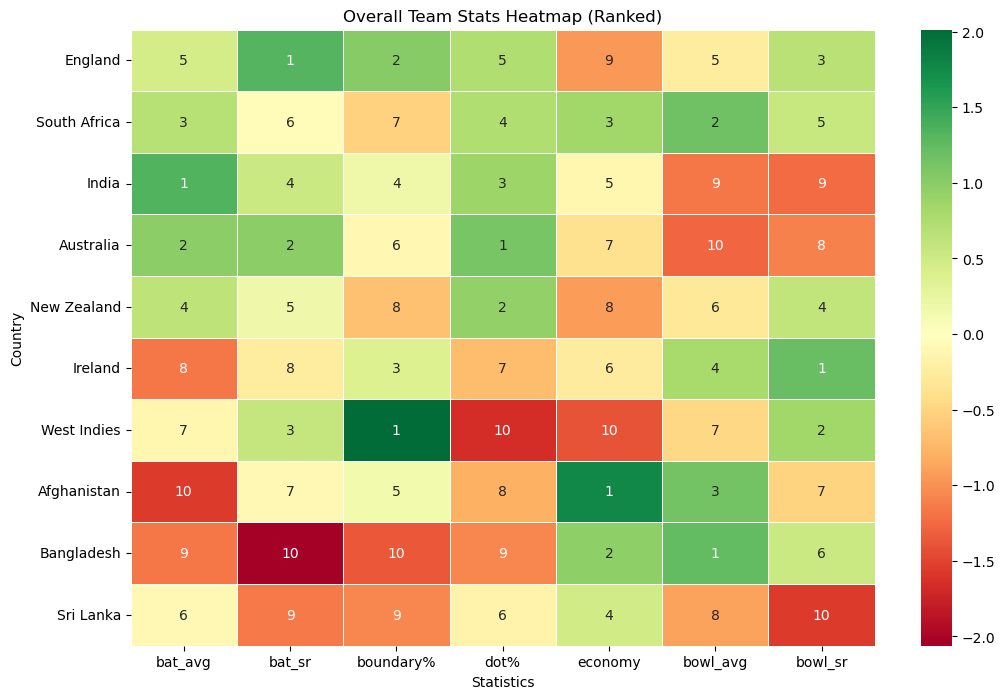

In [27]:
normalized_df=normalized_df.reindex(ranked_df.index)

plt.figure(figsize=(12, 8))
sns.heatmap(normalized_df, annot=ranked_df.drop(columns='overallrank'), fmt='d', cmap='RdYlGn', linewidths=.5, center=0)

# Title and labels
plt.title('Overall Team Stats Heatmap (Ranked)')
plt.xlabel('Statistics')
plt.ylabel('Country')

# Show the plot
plt.show()

In [28]:
df_bat_pp=get_battingstats(df[df['over']<=5])
df_bat_mid=get_battingstats(df[(df['over']>=6)&(df['over']<=14)])
df_bat_death=get_battingstats(df[(df['over']>=15)])
df_bowl_pp=get_bowling_stats(df[df['over']<=5])
df_bowl_mid=get_bowling_stats(df[(df['over']>=6)&(df['over']<=14)])
df_bowl_death=get_bowling_stats(df[(df['over']>=15)])

In [29]:
df_bat_pp.head()

,Country,matches_batted,bat_avg,bat_sr,dot%,boundary%
0,Afghanistan,100,27.00,122.59,51.78,72.31
1,Australia,513,35.91,132.15,44.31,67.47
2,Bangladesh,405,24.37,114.02,48.70,65.06
3,Canada,35,40.67,122.20,49.42,66.94
4,England,765,33.19,142.65,43.96,72.54


In [30]:
df_bat_mid.head()

,Country,matches_batted,bat_avg,bat_sr,dot%,boundary%
0,Afghanistan,338,25.57,112.18,40.11,50.95
1,Australia,716,32.44,134.89,31.63,54.00
2,Bangladesh,464,24.89,116.72,34.82,48.92
3,Canada,39,36.07,123.33,37.16,52.50
4,England,804,31.15,137.60,30.80,56.16


In [44]:
df[df['bat_out']==False][['p_match','team_bat','team_bowl','inns','date','out','over','ball','bat_out']]

,p_match,team_bat,team_bowl,inns,date,out,over,ball,bat_out
698,860281,Pakistan,Sri Lanka,2,2015-08-01,True,19,6,False
839,1121272,Chattogram Challengers,Rangpur Rangers,1,2017-11-25,True,2,2,False
1624,829775,Punjab Kings,Mumbai Indians,2,2015-05-03,True,19,5,False
2197,1137464,Burgher Recreation Club,Nondescripts Cricket Club,1,2018-02-27,True,20,5,False
2198,1137464,Burgher Recreation Club,Nondescripts Cricket Club,1,2018-02-27,True,20,6,False
...,...,...,...,...,...,...,...,...,...
1549905,1386111,Melbourne Renegades,Adelaide Strikers,2,2023-12-29,True,19,4,False
1551190,1386108,Perth Scorchers,Melbourne Renegades,1,2023-12-26,True,20,4,False
1551269,1386108,Melbourne Renegades,Perth Scorchers,2,2023-12-26,True,6,6,False
1553953,1373583,England,West Indies,1,2023-12-21,True,20,2,False


In [45]:
df[(df['p_match']==860281)&(df['inns']==2)&(df['over']==19)]

,p_match,inns,bat,p_bat,team_bat,bowl,p_bowl,team_bowl,ball,ball_id,...,batruns,ballfaced,bowlruns,bat_out,wagonX,wagonY,wagonZone,pitchLine,pitchLength,shotType
698,860281,2,Imad Wasim,227758,Pakistan,Lasith Malinga,49758,Sri Lanka,6,860281_2_19_6,...,1,1,1,False,223,320,4,OUTSIDE_OFFSTUMP,GOOD_LENGTH,ON_DRIVE
719,860281,2,Sohail Tanvir,43265,Pakistan,Lasith Malinga,49758,Sri Lanka,5,860281_2_19_5,...,1,1,1,True,248,149,2,OUTSIDE_OFFSTUMP,GOOD_LENGTH,STEERED
1185,860281,2,Anwar Ali,232491,Pakistan,Lasith Malinga,49758,Sri Lanka,1,860281_2_19_1,...,6,1,6,True,352,219,3,OUTSIDE_OFFSTUMP,FULL,FLICK
1186,860281,2,Anwar Ali,232491,Pakistan,Lasith Malinga,49758,Sri Lanka,2,860281_2_19_2,...,2,1,2,True,287,109,2,ON_THE_STUMPS,GOOD_LENGTH,FLICK
1187,860281,2,Anwar Ali,232491,Pakistan,Lasith Malinga,49758,Sri Lanka,3,860281_2_19_3,...,4,1,4,True,328,85,2,DOWN_LEG,FULL_TOSS,FLICK
1188,860281,2,Anwar Ali,232491,Pakistan,Lasith Malinga,49758,Sri Lanka,4,860281_2_19_4,...,0,1,0,True,171,118,8,OUTSIDE_OFFSTUMP,GOOD_LENGTH,SLOG_SHOT


In [47]:
df[(df['bat_out']==False)][['dismissal','out','bat','bowl','over','ball']]

,dismissal,out,bat,bowl,over,ball
698,run out,True,Imad Wasim,Lasith Malinga,19,6
839,run out,True,Soumya Sarkar,Lasith Malinga,2,2
1624,run out,True,Wriddhiman Saha,Lasith Malinga,19,5
2197,run out,True,Suraj Randiv,Lasith Malinga,20,5
2198,run out,True,Suraj Randiv,Lasith Malinga,20,6
...,...,...,...,...,...,...
1549905,retired out,True,Tom Rogers,David Payne,19,4
1551190,run out,True,Jason Behrendorff,Kane Richardson,20,4
1551269,run out,True,Joe Clarke,Andrew Tye,6,6
1553953,run out,True,Sam Curran,Jason Holder,20,2


In [48]:
df[(df['bat_out']==False)]['dismissal'].unique()

array(['run out', 'caught', 'retired not out (hurt)', 'not out', 'bowled',
       'obstructing the field', 'retired out'], dtype=object)

In [49]:
df[(df['bat_out']==False)&(df['dismissal']=='caught')][['p_match','team_bat','team_bowl','inns','date','out','over','ball','bat_out']]

,p_match,team_bat,team_bowl,inns,date,out,over,ball,bat_out
8654,937181,Colts Cricket Club,Sri Lanka Army,2,2016-01-12,True,12,1,False
16697,1068376,Nottinghamshire,Leicestershire,1,2017-08-02,True,17,2,False
81787,1127558,Glamorgan,Somerset,2,2018-08-12,True,11,2,False
86948,1068355,Hampshire,Somerset,2,2017-07-26,False,16,6,False
245061,1127578,Sussex,Somerset,1,2018-09-15,True,19,6,False
525700,1155326,Colombo,Dambulla,2,2018-08-25,True,3,2,False
568072,1167258,Essex,Derbyshire,1,2019-09-21,True,11,3,False
699687,1211923,Ragama Cricket Club,Colts Cricket Club,2,2020-01-17,True,4,1,False
700213,1253166,Burgher Recreation Club,Colombo Cricket Club,1,2021-03-14,True,20,3,False
700740,1253101,Galle Cricket Club,Colombo Cricket Club,1,2021-03-04,True,2,1,False
